In [1]:
# Import required libraries
import os
import numpy as np
import rasterio
from rasterio.enums import Resampling

# Define the paths
train_path = 'global-land-cover-mapping-openearthmap/label/train'
val_path = 'global-land-cover-mapping-openearthmap/label/val'
train_converted_path = 'global-land-cover-mapping-openearthmap/label/train_converted'
val_converted_path = 'global-land-cover-mapping-openearthmap/label/val_converted'

# Create directories for converted images if they don't exist
os.makedirs(train_converted_path, exist_ok=True)
os.makedirs(val_converted_path, exist_ok=True)



In [2]:
# Define the conversion function
def convert_labels(image):
    label_mapping = {
        0: 0, 1: 0, 2: 0, 7: 0, 3: 0,
        5: 1,
        6: 2,
        4: 3,
        8: 4
    }
    converted_image = np.copy(image)
    for original_value, new_value in label_mapping.items():
        converted_image[image == original_value] = new_value
    return converted_image

# Define the function to process images in a directory
def process_directory(input_dir, output_dir):
    for filename in os.listdir(input_dir):
        if filename.endswith('.tif'):
            input_path = os.path.join(input_dir, filename)
            output_path = os.path.join(output_dir, filename)
            
            # Read the image
            with rasterio.open(input_path) as src:
                image = src.read(1)  # Read the first band
                
                # Convert the labels
                converted_image = convert_labels(image)
                
                # Write the converted image
                profile = src.profile
                with rasterio.open(output_path, 'w', **profile) as dst:
                    dst.write(converted_image, 1)

# Process the training and validation directories
process_directory(train_path, train_converted_path)
process_directory(val_path, val_converted_path)

print("Conversion completed!")


Conversion completed!


In [3]:
import matplotlib.pyplot as plt
from rasterio.plot import show

Width: 1000 pixels
Height: 1000 pixels


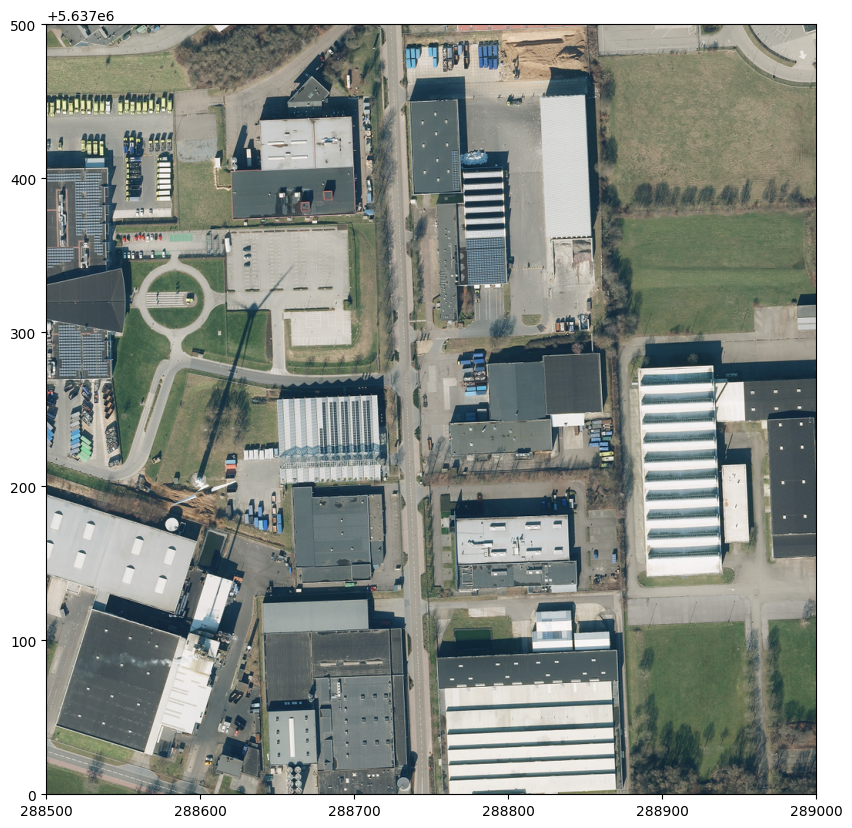

In [4]:
# Path to the image file
image_path = 'global-land-cover-mapping-openearthmap/images/train/aachen_4.tif'

# Open the image using rasterio
with rasterio.open(image_path) as src:
    # Get width and height of the image
    width = src.width
    height = src.height
    
    # Print the width and height
    print(f'Width: {width} pixels')
    print(f'Height: {height} pixels')
    
    # Read the image
    image = src.read()
    
    # Display the image using matplotlib
    plt.figure(figsize=(10, 10))
    show(image, transform=src.transform)
    # plt.title('Aachen 1')
    plt.show()

Width: 1000 pixels
Height: 1000 pixels


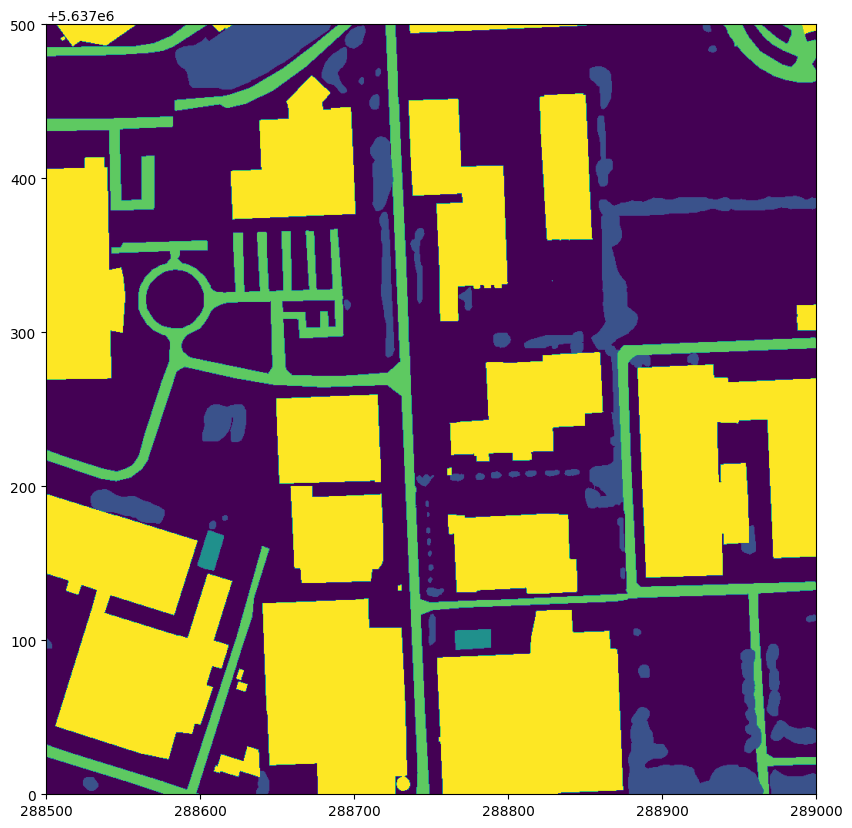

Unique pixel values: [0 1 2 3 4]


In [5]:
# Path to the image file
image_path = 'global-land-cover-mapping-openearthmap/label/train_converted/aachen_4.tif'

# Open the image using rasterio
with rasterio.open(image_path) as src:
    # Get width and height of the image
    width = src.width
    height = src.height
    
    # Print the width and height
    print(f'Width: {width} pixels')
    print(f'Height: {height} pixels')
    
    # Read the image
    image = src.read()
    
    # Display the image using matplotlib
    plt.figure(figsize=(10, 10))
    show(image, transform=src.transform)
    plt.show()

    # Get all unique pixel values
    unique_values = np.unique(image)
    
    # Print the unique pixel values
    print('Unique pixel values:', unique_values)